In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Strategy 1

In [ ]:
# Define the ticker symbol and date range
ticker = 'SPY'
start_date = '2010-01-01'
end_date = '2024-12-31'

# Fetch the historical data
spy_data = yf.download(ticker, start=start_date, end=end_date)

# Ensure the index is in datetime format
spy_data.index = pd.to_datetime(spy_data.index)

# Initialize a list to store the results
strategy1_results = []

# Loop through each year
for year in range(2010, 2025):
    # Filter data for the specific year
    yearly_data = spy_data.loc[f'{year}-01-01':f'{year}-12-31']

    # Initialize capital
    balance = 1_000_000

    # Simulate the strategy
    for i in range(1, len(yearly_data)):
        # Previous day close and current day open
        previous_close = yearly_data['Close'].iloc[i - 1]
        current_open = yearly_data['Open'].iloc[i]

        # Calculate overnight return
        overnight_return = current_open / previous_close

        # Update balance based on overnight return
        balance *= overnight_return

    # Append the year's final balance to results list
    strategy1_results.append({
        'Year': year,
        'Final_Balance': balance
    })

# Convert results to a DataFrame
strategy1_results_df = pd.DataFrame(strategy1_results)

# Display the results
print(strategy1_results_df)

[*********************100%***********************]  1 of 1 completed


    Year                               Final_Balance
0   2010   Ticker
SPY    1.046460e+06
dtype: float64
1   2011   Ticker
SPY    1.020288e+06
dtype: float64
2   2012   Ticker
SPY    1.017896e+06
dtype: float64
3   2013   Ticker
SPY    1.099572e+06
dtype: float64
4   2014   Ticker
SPY    1.092599e+06
dtype: float64
5   2015  Ticker
SPY    998271.290085
dtype: float64
6   2016  Ticker
SPY    963226.187538
dtype: float64
7   2017   Ticker
SPY    1.121702e+06
dtype: float64
8   2018   Ticker
SPY    1.121146e+06
dtype: float64
9   2019   Ticker
SPY    1.146398e+06
dtype: float64
10  2020   Ticker
SPY    1.118140e+06
dtype: float64
11  2021   Ticker
SPY    1.155780e+06
dtype: float64
12  2022  Ticker
SPY    850384.811298
dtype: float64
13  2023   Ticker
SPY    1.037583e+06
dtype: float64
14  2024   Ticker
SPY    1.188863e+06
dtype: float64


# Strategy 2

In [ ]:
# Define the ticker symbol and date range
ticker = 'SPY'
start_date = '2010-01-01'
end_date = '2024-12-31'

# Fetch the historical data
spy_data = yf.download(ticker, start=start_date, end=end_date)

# Ensure the index is in datetime format
spy_data.index = pd.to_datetime(spy_data.index)

# Initialize a list to store the results
strategy2_results = []

# Loop through each year
for year in range(2010, 2025):
    # Filter data for the specific year
    yearly_data = spy_data.loc[f'{year}-01-01':f'{year}-12-31']

    # Initialize capital
    balance = 1_000_000

    # Simulate the strategy
    for i in range(1, len(yearly_data)):
        # Previous day close, current day open, and current day close
        previous_close = yearly_data['Close'].iloc[i - 1]
        current_open = yearly_data['Open'].iloc[i]
        current_close = yearly_data['Close'].iloc[i]

        # Calculate overnight return from previous close to current open
        overnight_return = current_open / previous_close
        # Update balance based on overnight return
        balance *= overnight_return

        # Calculate intraday return for short position from open to close
        intraday_return = previous_close / current_close
        # Update balance based on intraday short position
        balance *= intraday_return

    # Append the year's final balance to results list
    strategy2_results.append({
        'Year': year,
        'Final_Balance': balance
    })

# Convert results to a DataFrame
strategy2_results_df = pd.DataFrame(strategy2_results)

# Display the results
print(strategy2_results_df)

[*********************100%***********************]  1 of 1 completed


    Year                               Final_Balance
0   2010  Ticker
SPY    943104.088548
dtype: float64
1   2011   Ticker
SPY    1.032889e+06
dtype: float64
2   2012  Ticker
SPY    911324.695021
dtype: float64
3   2013  Ticker
SPY    869584.332057
dtype: float64
4   2014  Ticker
SPY    972356.347999
dtype: float64
5   2015   Ticker
SPY    1.005910e+06
dtype: float64
6   2016  Ticker
SPY    866227.054049
dtype: float64
7   2017  Ticker
SPY    946759.348182
dtype: float64
8   2018   Ticker
SPY    1.205707e+06
dtype: float64
9   2019   Ticker
SPY    891088.70426
dtype: float64
10  2020  Ticker
SPY    971569.152761
dtype: float64
11  2021  Ticker
SPY    897422.885305
dtype: float64
12  2022   Ticker
SPY    1.062253e+06
dtype: float64
13  2023  Ticker
SPY    831314.817303
dtype: float64
14  2024  Ticker
SPY    983729.538733
dtype: float64


# Strategy 3

In [ ]:
# Define the ticker symbol and date range
ticker = 'SPY'
start_date = '2010-01-01'
end_date = '2024-12-31'

# Fetch the historical data
spy_data = yf.download(ticker, start=start_date, end=end_date)

# Ensure the index is in datetime format
spy_data.index = pd.to_datetime(spy_data.index)

# Initialize a list to store the results
strategy3_results = []

# Loop through each year
for year in range(2010, 2025):
    # Filter data for the specific year
    yearly_data = spy_data.loc[f'{year}-01-01':f'{year}-12-31']

    # Initialize weekly balance
    weekly_balance = 1_000_000

    # Track end-of-year balance
    end_of_year_balance = weekly_balance

    # Simulate the strategy day-by-day
    for i in range(1, len(yearly_data)):
        # Weekly reset of balance on Mondays
        if yearly_data.index[i].weekday() == 0:  # 0 represents Monday
            weekly_balance = 1_000_000

        # Previous day close and current day open
        previous_close = yearly_data['Close'].iloc[i - 1]
        current_open = yearly_data['Open'].iloc[i]

        # Apply fixed 1.25x leverage for overnight position
        overnight_return = (current_open / previous_close) - 1
        weekly_balance *= (1 + 1.25 * overnight_return)

        # Current day open and close for intraday short position
        current_close = yearly_data['Close'].iloc[i]

        # Apply fixed 1.25x leverage for intraday short position
        intraday_return = (previous_close / current_close) - 1
        weekly_balance *= (1 + 1.25 * intraday_return)

        # Update end-of-year balance
        end_of_year_balance = weekly_balance

    # Append the year's final balance to results list
    strategy3_results.append({
        'Year': year,
        'Final_Balance': end_of_year_balance
    })

# Convert results to a DataFrame
strategy3_results_df = pd.DataFrame(strategy3_results)

# Display the results
print(strategy3_results_df)

[*********************100%***********************]  1 of 1 completed


    Year                               Final_Balance
0   2010  Ticker
SPY    994722.819756
dtype: float64
1   2011  Ticker
SPY    994219.514693
dtype: float64
2   2012  Ticker
SPY    975875.747984
dtype: float64
3   2013  Ticker
SPY    996140.312342
dtype: float64
4   2014   Ticker
SPY    1.015579e+06
dtype: float64
5   2015   Ticker
SPY    1.007308e+06
dtype: float64
6   2016   Ticker
SPY    1.017585e+06
dtype: float64
7   2017   Ticker
SPY    1.020303e+06
dtype: float64
8   2018  Ticker
SPY    998179.597598
dtype: float64
9   2019   Ticker
SPY    1.002079e+06
dtype: float64
10  2020   Ticker
SPY    1.000544e+06
dtype: float64
11  2021  Ticker
SPY    993633.343218
dtype: float64
12  2022  Ticker
SPY    995655.875198
dtype: float64
13  2023  Ticker
SPY    999887.075684
dtype: float64
14  2024   Ticker
SPY    1.012522e+06
dtype: float64


# Chart

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


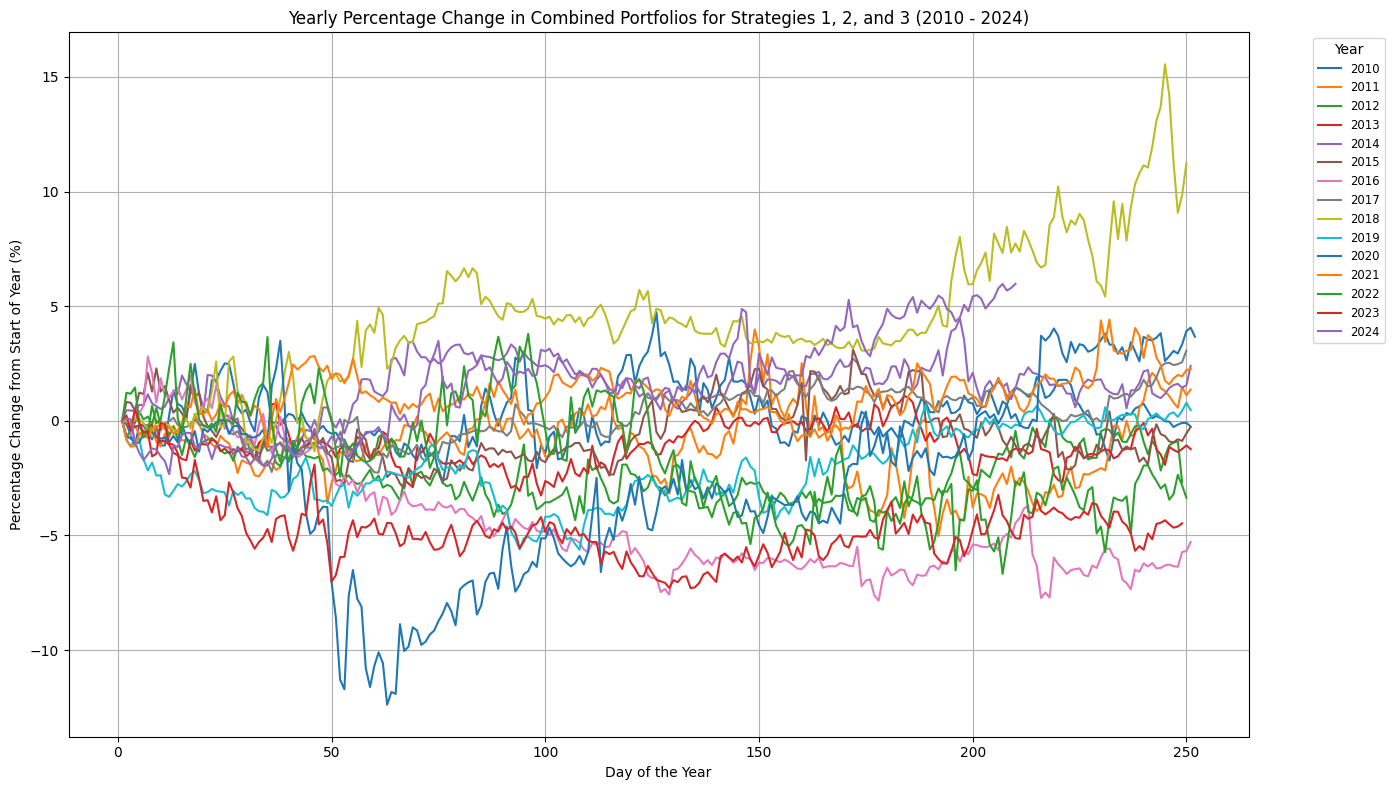

In [ ]:
# Define the ticker symbol and date range
ticker = 'SPY'
start_date = '2010-01-01'
end_date = '2024-12-31'

# Fetch the historical data
spy_data = yf.download(ticker, start=start_date, end=end_date)
spy_data.index = pd.to_datetime(spy_data.index)

# Initialize a list to store balance progressions for each year
balance_progression = []

# Loop through each year and simulate all three strategies as separate portfolios
for year in range(2010, 2025):
    # Filter data for the specific year
    yearly_data = spy_data.loc[f'{year}-01-01':f'{year}-12-31']

    # Initialize capital for each strategy
    balance1 = balance2 = balance3 = 1_000_000
    daily_balances_combined = []  # Track daily combined balance for the three portfolios

    # Simulate daily progression
    for i in range(1, len(yearly_data)):
        # Previous day close and current day open
        previous_close = yearly_data['Close'].iloc[i - 1]
        current_open = yearly_data['Open'].iloc[i]
        current_close = yearly_data['Close'].iloc[i]

        # Strategy 1 (Overnight Long only)
        balance1 *= current_open / previous_close

        # Strategy 2 (Overnight Long + Intraday Short)
        balance2 *= (current_open / previous_close) * (previous_close / current_close)

        # Strategy 3 (Fixed Overnight & Intraday with Weekly Reset)
        if yearly_data.index[i].weekday() == 0:  # Reset every Monday
            balance3 = 1_000_000
        balance3 *= (current_open / previous_close) * (previous_close / current_close)

        # Combined balance as the average of the three portfolios
        combined_balance = (balance1 + balance2 + balance3) / 3
        daily_balances_combined.append(combined_balance)

    # Convert combined balances to percentage change from the start of the year
    start_balance = daily_balances_combined[0]
    daily_pct_change = [(b / start_balance - 1) * 100 for b in daily_balances_combined]

    # Store the data in a DataFrame
    balance_progression.append(pd.DataFrame({
        'DayOfYear': range(1, len(daily_pct_change) + 1),
        'PctChange': daily_pct_change,
        'Year': year
    }))

# Concatenate all years into a single DataFrame
balance_progression_df = pd.concat(balance_progression)

# Plot the data
plt.figure(figsize=(14, 8))

# Plot each year's combined portfolio performance
for year, year_data in balance_progression_df.groupby('Year'):
    plt.plot(year_data['DayOfYear'], year_data['PctChange'], label=str(year))

# Customize the plot
plt.title('Yearly Percentage Change in Combined Portfolios for Strategies 1, 2, and 3 (2010 - 2024)')
plt.xlabel('Day of the Year')
plt.ylabel('Percentage Change from Start of Year (%)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()